<a href="https://colab.research.google.com/github/payares0510/metodos-computacionales-1/blob/main/interpolaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

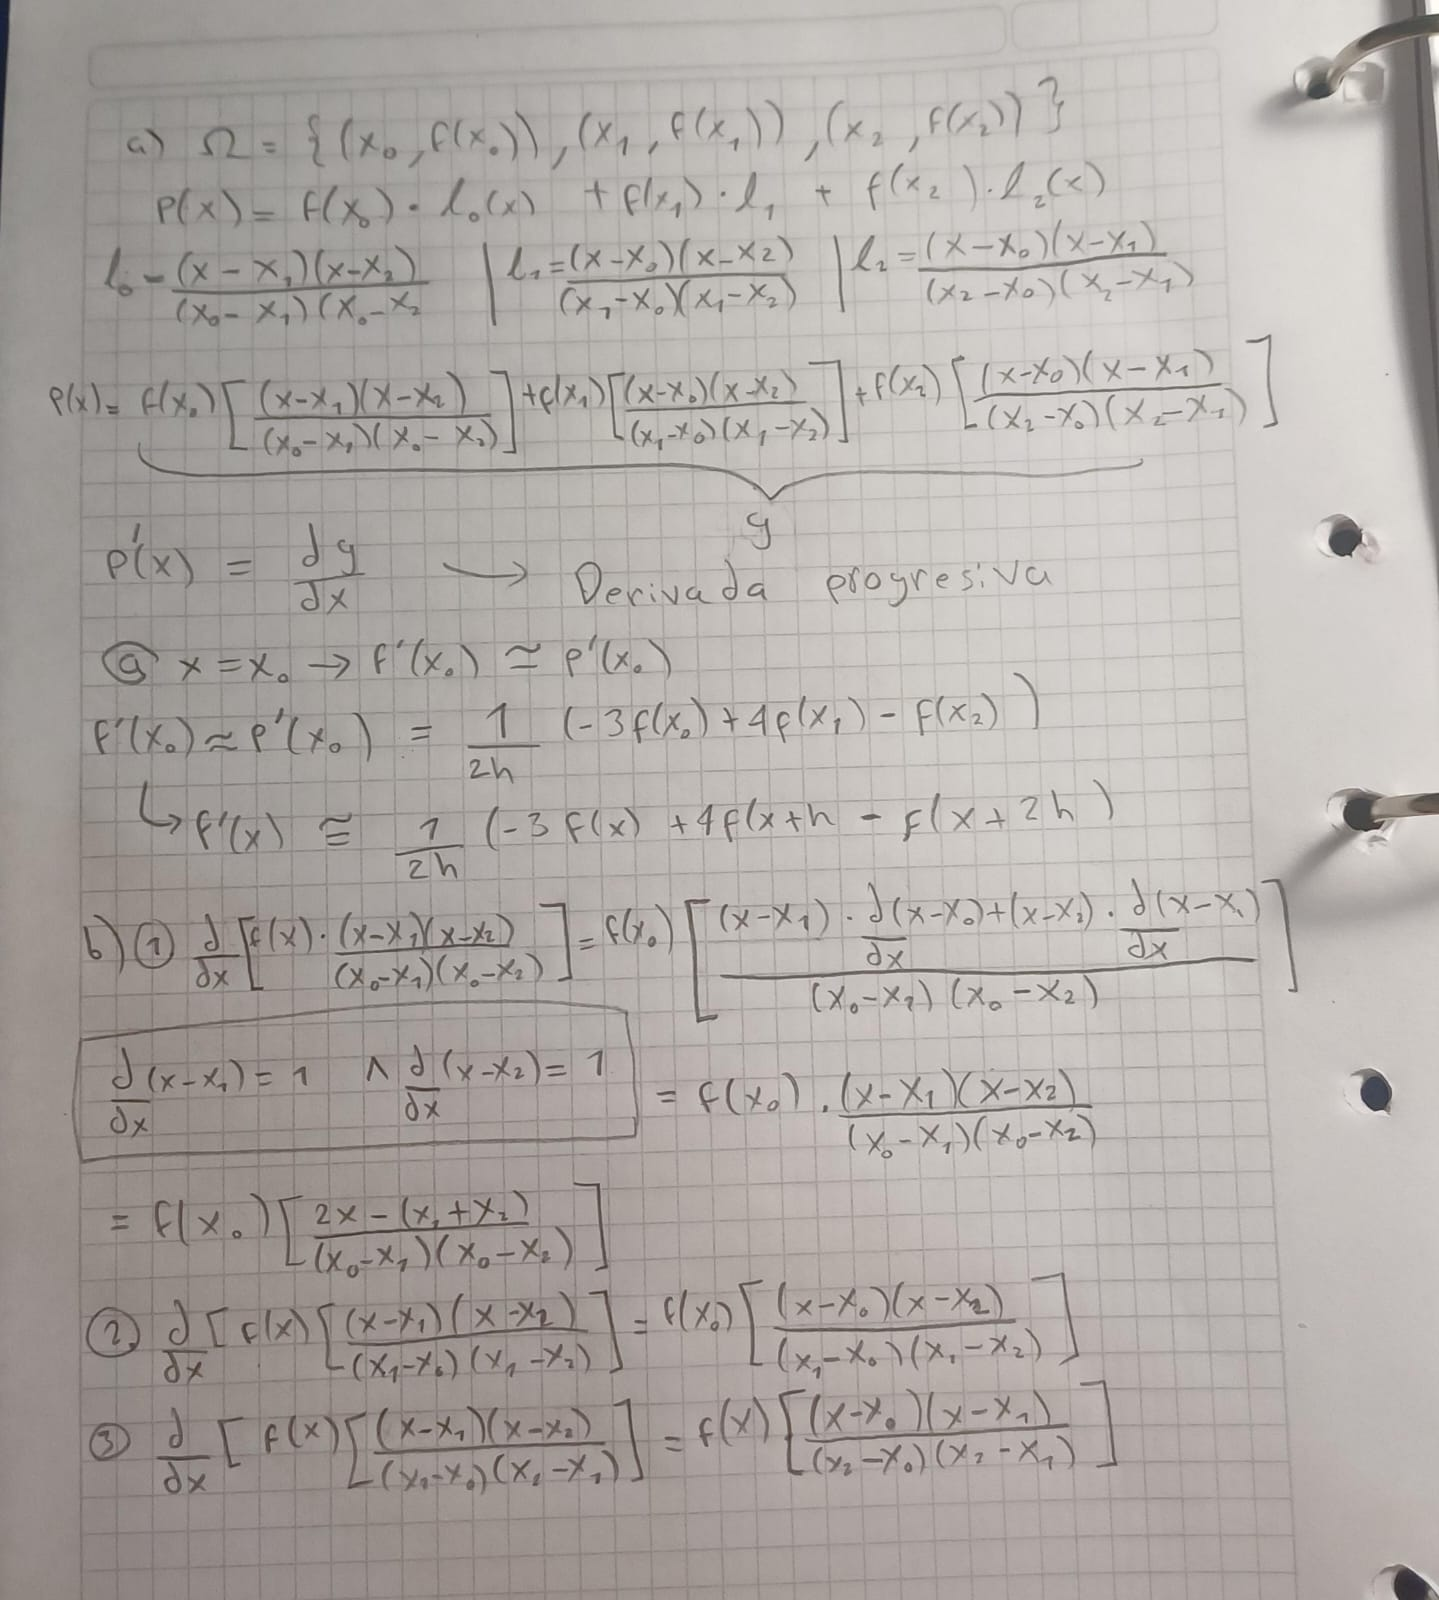

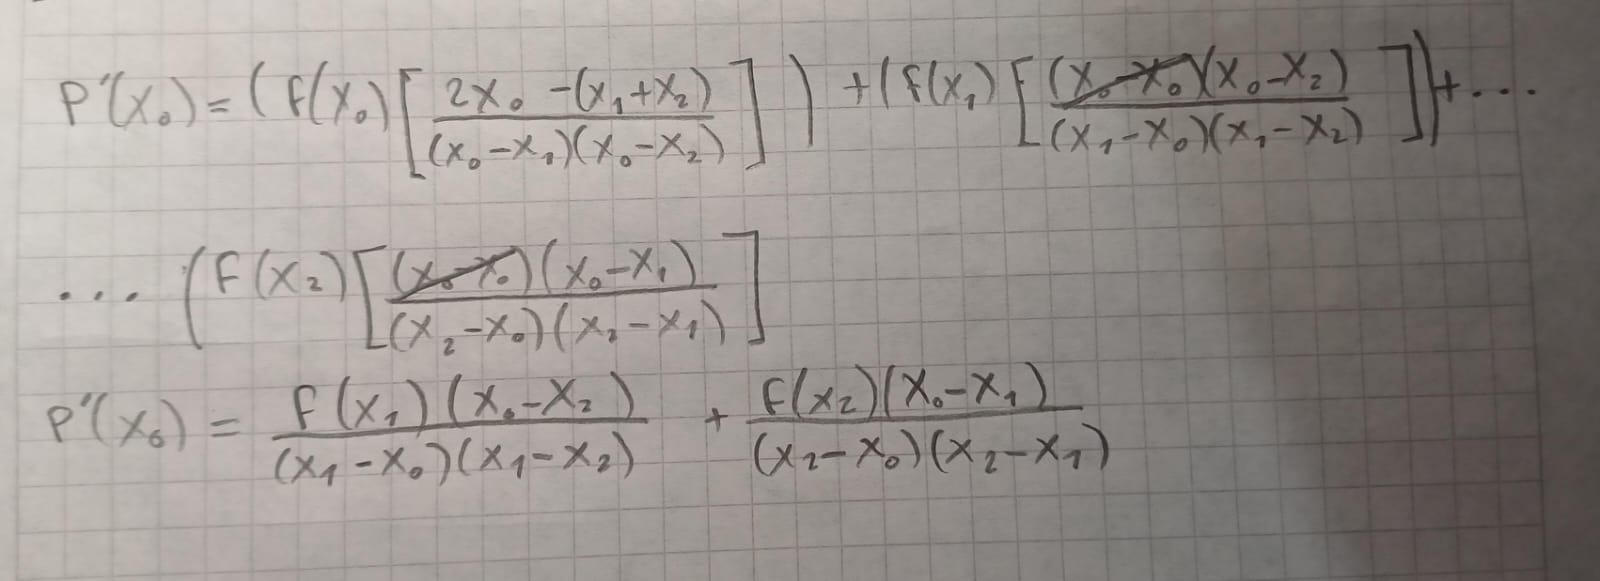

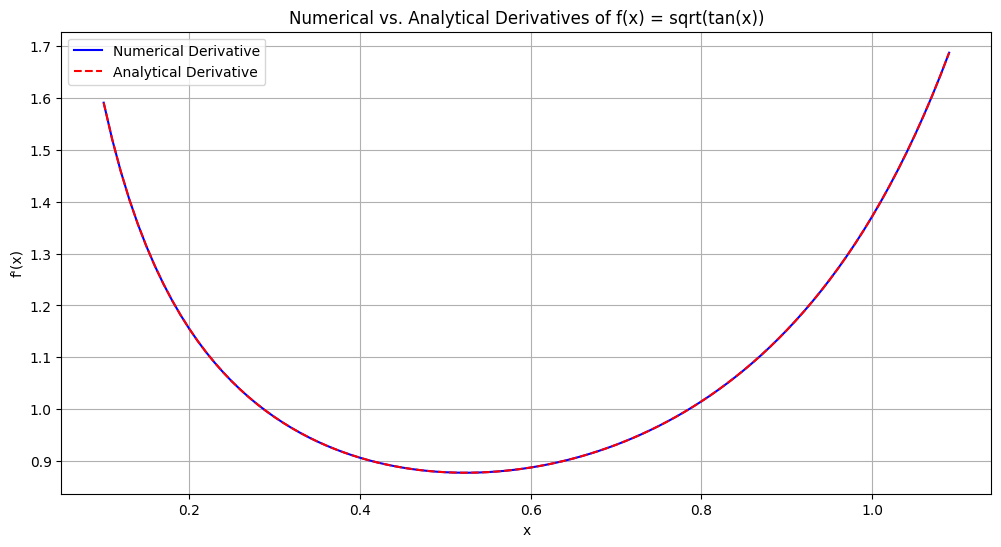

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
import math
import numpy as np
import matplotlib.pyplot as plt

#C
def f(x):

    return np.sqrt(np.tan(x))

def f_prime_analytical(x):

    return (-f(x + 2*h) + 4*f(x + h) - 3*f(x)) / (2*h)

h = 0.01
x_start = 0.1
x_end = 1.1

x_values = np.arange(x_start, x_end - 2*h + h, h)

f_x = f(x_values)
f_x_h = f(x_values + h)
f_x_2h = f(x_values + 2*h)

f_prime_numerical = (-3 * f_x + 4 * f_x_h - f_x_2h) / (2 * h)

f_prime_exact = f_prime_analytical(x_values)

plt.figure(figsize=(12, 6))
plt.plot(x_values, f_prime_numerical, label='Numerical Derivative', color='blue')
plt.plot(x_values, f_prime_exact, label='Analytical Derivative', linestyle='--', color='red')
plt.xlabel('x')
plt.ylabel("f'(x)")
plt.title("Numerical vs. Analytical Derivatives of f(x) = sqrt(tan(x))")
plt.legend()
plt.grid(True)
plt.show()

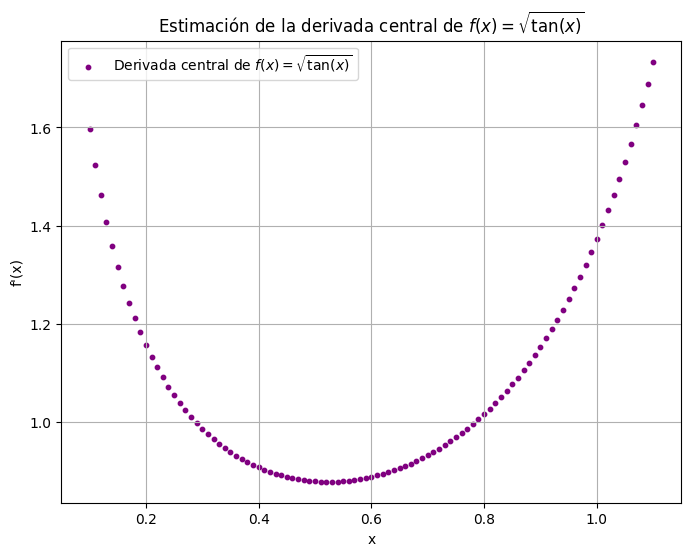

In [ ]:
#D

def derivada_central(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)
    h = 0.01
x_values = np.arange(0.1, 1.1 + h, h)
derivatives_central = [derivada_central(f, x, h) for x in x_values]

# Graficar las derivadas centrales
plt.figure(figsize=(8, 6))
plt.scatter(x_values, derivatives_central, label="Derivada central de $f(x) = \sqrt{\\tan(x)}$", color='purple',s=10)
plt.title("Estimación de la derivada central de $f(x) = \sqrt{\\tan(x)}$")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.grid(True)
plt.legend()
plt.show()

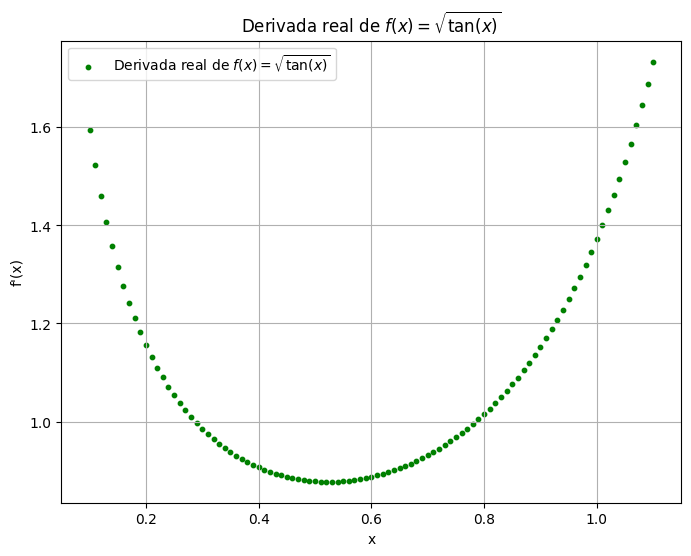

In [ ]:
def derivative_real(x):
    return 1/(2*np.sqrt(np.tan(x))*(np.cos(x))**2)
derivative_real_values = [derivative_real(x) for x in x_values]

# Graficar las derivadas reales
plt.figure(figsize=(8, 6))
plt.scatter(x_values, derivative_real_values, label="Derivada real de $f(x) = \sqrt{\\tan(x)}$", color='g',s=10)
plt.title("Derivada real de $f(x) = \sqrt{\\tan(x)}$")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.grid(True)
plt.legend()
plt.show()

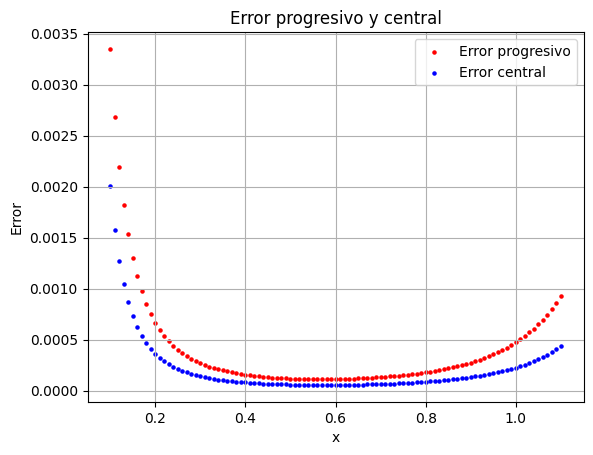

In [ ]:
#f)
ErrorProgresivo = np.abs([f_prime_analytical(x_values[i]) - derivative_real(x_values[i]) for i in range(len(x_values))]) # Call f_prime_analytical with x_values[i] as an argument
ErrorCentral = np.abs([derivatives_central[i] - derivative_real(x_values[i]) for i in range(len(x_values))])
plt.scatter(x_values, ErrorProgresivo, label="Error progresivo", color='r',s=5)
plt.scatter(x_values, ErrorCentral, label="Error central", color='b',s=5)
plt.legend()
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error progresivo y central')
plt.grid(True)
plt.show()

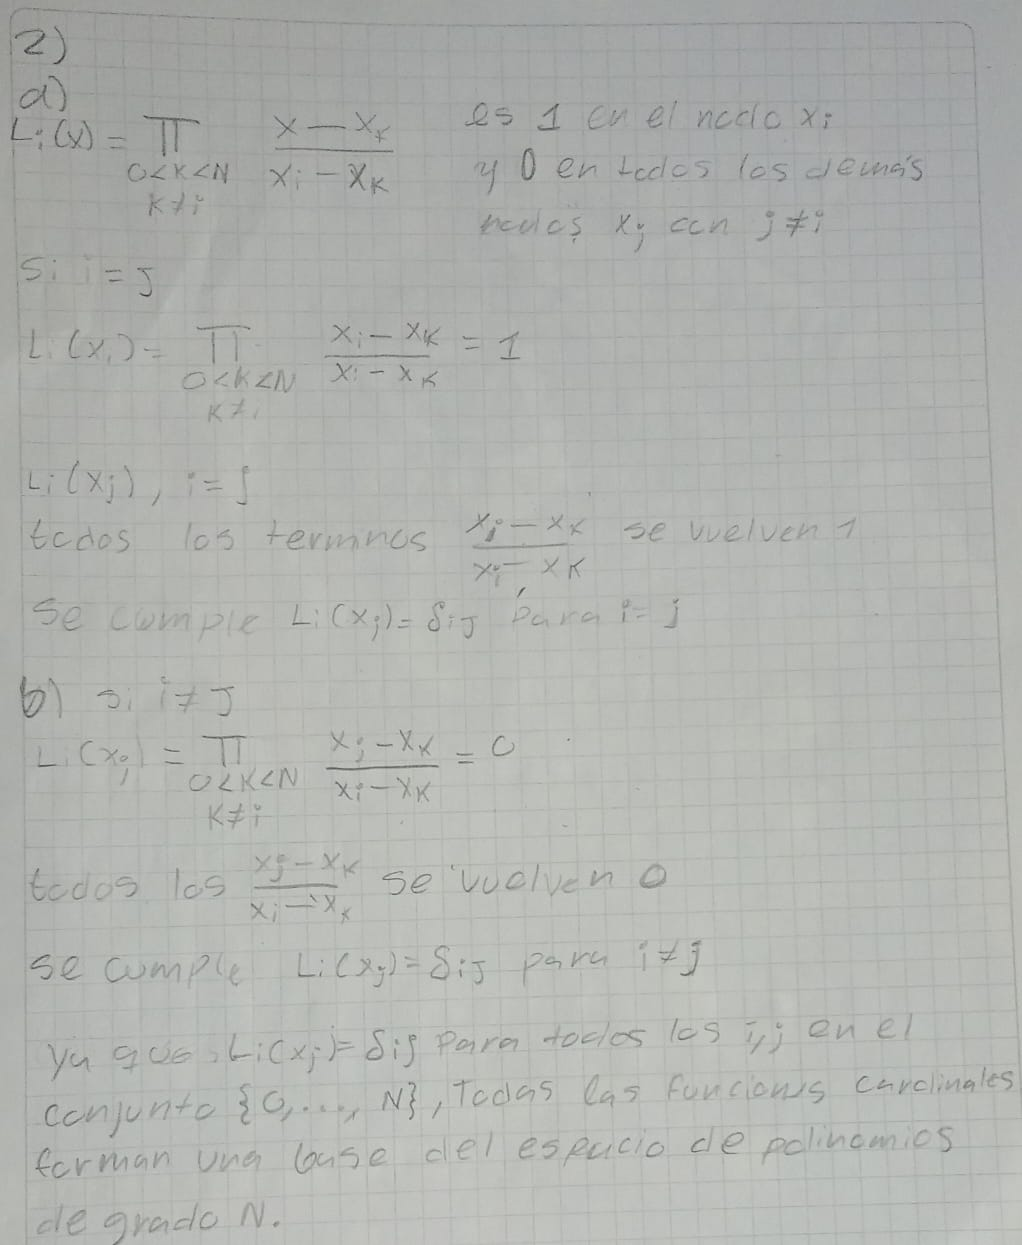

In [ ]:
#lagrange 3
z = np.array([100,121,144])
Y=  np.array([10,11,12])
x=114



def lagrange(x,z,y):

    n = len(z)
    y = 0
    for i in range(n):
        term = Y[i]
        for j in range(n):
            if j != i:
                term *= (x - z[j]) / (z[i] - z[j])
        y += term
    return y
y_interp=lagrange(x,z,Y)
error_aprox = abs(y_interp - np.sqrt(x))
print(error_aprox)
print(y_interp)

0.0011889239680691333
10.675889328063242


Polinomio de Lagrange: P(x) = -0.05549x^2 + 0.36397x + -0.00000
Velocidad inicial, v0 = 10.00 m/s
Ángulo de lanzamiento, theta = 20.00 grados


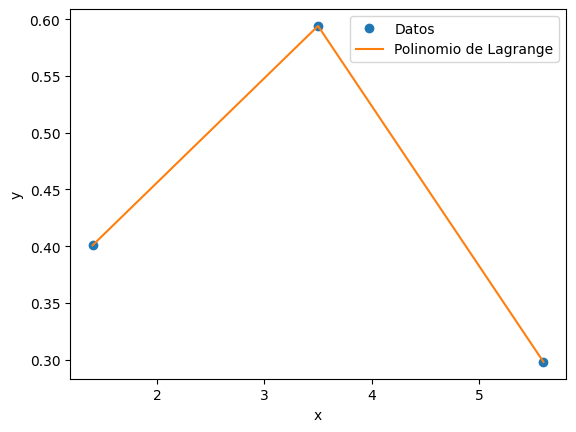

In [ ]:
#lagrange 4
x = np.array([1.4, 3.5, 5.6])
y = np.array([0.400795493181973, 0.594128102489774, 0.29802795523938164])

def Lagrange_polynomial(x, y):
    n = len(x)
    P = np.poly1d(0)
    for i in range(n):
        L = np.poly1d(1)
        for j in range(n):
            if i != j:
                L *= np.poly1d([1, -x[j]]) / (x[i] - x[j])
        P += y[i] * L
    return P


P = Lagrange_polynomial(x, y)
a, b, c = P.coefficients


g = 9.8



theta = np.arctan(b)
v0 = np.sqrt(-g / (2 * a * np.cos(theta)**2))

theta_deg = np.degrees(theta)

print(f"Polinomio de Lagrange: P(x) = {a:.5f}x^2 + {b:.5f}x + {c:.5f}")
print(f"Velocidad inicial, v0 = {v0:.2f} m/s")
print(f"Ángulo de lanzamiento, theta = {theta_deg:.2f} grados")
plt.plot(x, y, 'o', label='Datos')
plt.plot(x, P(x), label='Polinomio de Lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()